In [1]:

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


# Final report 

In [2]:
import warnings 
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import h5py
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import math 
import re 
import pandas as pd


 
The report file is loaded from folder:

In [3]:
folder = '/home/vvasco/.local/share/yarp/contexts/motionAnalyzer/'
f = h5py.File(folder+'test_data_fdg.mat','r')
print folder 

/home/vvasco/.local/share/yarp/contexts/motionAnalyzer/


In [4]:
tagkeypoints = []
tagkeypoints.append('shoulderCenter')
tagkeypoints.append('head')
tagkeypoints.append('shoulderLeft')
tagkeypoints.append('elbowLeft')
tagkeypoints.append('handLeft')
tagkeypoints.append('shoulderRight')
tagkeypoints.append('elbowRight')
tagkeypoints.append('handRight')
tagkeypoints.append('hipLeft')
tagkeypoints.append('kneeLeft')
tagkeypoints.append('ankleLeft')
tagkeypoints.append('hipRight')
tagkeypoints.append('kneeRight')
tagkeypoints.append('ankleRight') 

In [5]:
skeleton = namedtuple('skeleton', 
                      ['shoulderCenter','head','shoulderLeft','shoulderRight',
                      'elbowLeft','handLeft','elbowRight','handRight',
                      'hipLeft','hipRight','ankleLeft','ankleRight',
                      'kneeLeft','kneeRight'])

shoulderCenter = namedtuple('shoulderCenter', ['parent','child'])
head = namedtuple('head', ['parent','child'])
shoulderLeft = namedtuple('shoulderLeft', ['parent','child'])
shoulderRight = namedtuple('shoulderRight', ['parent','child'])
elbowLeft = namedtuple('elbowLeft', ['parent','child'])
handLeft = namedtuple('handLeft', ['parent','child'])
elbowRight = namedtuple('elbowRight', ['parent','child'])
handRight = namedtuple('handRight', ['parent','child'])
hipLeft = namedtuple('hipLeft', ['parent','child'])
hipRight = namedtuple('hipRight', ['parent','child'])
ankleLeft = namedtuple('ankleLeft', ['parent','child'])
ankleRight = namedtuple('ankleRight', ['parent','child'])
kneeLeft = namedtuple('kneeLeft', ['parent','child'])
kneeRight = namedtuple('kneeRight', ['parent','child'])

scSubst = shoulderCenter([''],['head','shoulderLeft','shoulderRight','hipLeft','hipRight'])
heSubst = head(['shoulderCenter'],[''])
slSubst = shoulderLeft(['shoulderCenter'],['elbowLeft'])
srSubst = shoulderRight(['shoulderCenter'],['elbowRight'])
elSubst = elbowLeft(['shoulderLeft'],['handLeft'])
hlSubst = handLeft(['elbowLeft'],[''])
erSubst = elbowRight(['shoulderRight'],['handRight'])
hrSubst = handRight(['elbowRight'],[''])
hilSubst = hipLeft(['shoulderCenter'],['kneeLeft'])
hirSubst = hipRight(['shoulderCenter'],['kneeRight'])
alSubst = ankleLeft(['kneeLeft'],[''])
arSubst = ankleRight(['kneeRight'],[''])
klSubst = kneeLeft(['hipLeft'],['ankleLeft'])
krSubst = kneeRight(['hipRight'],['ankleRight'])

skel = skeleton(scSubst,heSubst,slSubst,srSubst,elSubst,hlSubst,erSubst,
                  hrSubst,hilSubst,hirSubst,alSubst,arSubst,klSubst,krSubst) 

In [6]:
nsessions = f['Keypoints']['shoulderCenter'].shape[1]
keypoints = namedtuple('keypoints', 
                      ['shoulderCenter','head','shoulderLeft','shoulderRight',
                      'elbowLeft','handLeft','elbowRight','handRight',
                      'hipLeft','hipRight','ankleLeft','ankleRight','kneeLeft','kneeRight'])

metric = namedtuple('ROM', ['motion_type','ref_joint','ref_direction','ref_plane',
'max','min','tstart','tend'])

time = f['Time_samples'][()]
time = np.transpose(time)

#hdf5 dataset keypoints
shoulderCenter_hdf5 = f['Keypoints']['shoulderCenter']
head_hdf5 = f['Keypoints']['head']
shoulderLeft_hdf5 = f['Keypoints']['shoulderLeft']
shoulderRight_hdf5 = f['Keypoints']['shoulderRight']
elbowLeft_hdf5 = f['Keypoints']['elbowLeft']
elbowRight_hdf5 = f['Keypoints']['elbowRight']
handRight_hdf5 = f['Keypoints']['handRight']
hipLeft_hdf5 = f['Keypoints']['hipLeft']
hipRight_hdf5 = f['Keypoints']['hipRight']
ankleLeft_hdf5 = f['Keypoints']['ankleLeft']
ankleRight_hdf5 = f['Keypoints']['ankleRight']
kneeLeft_hdf5 = f['Keypoints']['kneeLeft']
kneeRight_hdf5 = f['Keypoints']['kneeRight']
shoulderCenter=[]
head=[]
shoulderLeft=[]
shoulderRight=[]
elbowLeft=[]
elbowRight=[]
handRight=[]
hipLeft=[]
hipRight=[]
ankleLeft=[]
ankleRight=[]
kneeLeft=[]
kneeRight=[]

motion_type_hdf5 = f['ROM']['motion_type']
refjoint_hdf5 = f['ROM']['ref_joint']
refdir_hdf5 = f['ROM']['ref_direction']
refplane_hdf5 = f['ROM']['ref_plane']
max_hdf5 = f['ROM']['max']
min_hdf5 = f['ROM']['min']
tstart_hdf5 = f['ROM']['tstart']
tend_hdf5 = f['ROM']['tend']
motion_type=[]
ref_joint=[]
ref_direction=[]
ref_plane=[]
maxv=[]
minv=[]
tstart=[]
tend=[]
for j in range(0,nsessions):
    s = shoulderCenter_hdf5[0]
    shoulderCenter.append(np.transpose(f[s[j]][()]))
    s = head_hdf5[0]
    head.append(np.transpose(f[s[j]][()]))
    s = shoulderLeft_hdf5[0]
    shoulderLeft.append(np.transpose(f[s[j]][()]))
    s = shoulderRight_hdf5[0]
    shoulderRight.append(np.transpose(f[s[j]][()]))
    s = elbowLeft_hdf5[0]
    elbowLeft.append(np.transpose(f[s[j]][()]))   
    s = elbowRight_hdf5[0]
    elbowRight.append(np.transpose(f[s[j]][()]))
    s = handRight_hdf5[0]
    handRight.append(np.transpose(f[s[j]][()]))
    s = hipLeft_hdf5[0]
    hipLeft.append(np.transpose(f[s[j]][()]))
    s = hipRight_hdf5[0]
    hipRight.append(np.transpose(f[s[j]][()]))
    s = ankleLeft_hdf5[0]
    ankleLeft.append(np.transpose(f[s[j]][()]))
    s = ankleRight_hdf5[0]
    ankleRight.append(np.transpose(f[s[j]][()]))
    s = kneeLeft_hdf5[0]
    kneeLeft.append(np.transpose(f[s[j]][()]))
    s = kneeRight_hdf5[0]
    kneeRight.append(np.transpose(f[s[j]][()]))

    m = motion_type_hdf5[0]
    motion_type.append(re.sub(r'[^\w]', '',(f[m[j]][()]).tostring()))
    m = refjoint_hdf5[0]
    ref_joint.append(re.sub(r'[^\w]', '',(f[m[j]][()]).tostring()))                       
    m = refdir_hdf5[0]
    ref_direction.append(np.transpose(f[m[j]][()]))
    m = refplane_hdf5[0]
    ref_plane.append(np.transpose(f[m[j]][()]))
    m = max_hdf5[0]
    maxv.append(np.transpose(f[m[j]][()]))
    m = min_hdf5[0]
    minv.append(np.transpose(f[m[j]][()]))
    m = tstart_hdf5[0]
    tstart.append(np.transpose(f[m[j]][()]))       
    m = tend_hdf5[0]
    tend.append(np.transpose(f[m[j]][()]))

k = keypoints(shoulderCenter,head,shoulderLeft,shoulderRight,
              elbowLeft,handLeft,elbowRight,handRight,
              hipLeft,hipRight,ankleLeft,ankleRight,kneeLeft,kneeRight)
rom = metric(motion_type,ref_joint,ref_direction,ref_plane,maxv,minv,tstart,tend); 

 
The sessions are the following, along with the evaluated metric and joint:

In [7]:

data=[]
for i in range(0,nsessions):
    data.append([type(rom).__name__, rom.ref_joint[i], rom.motion_type[i],  np.asscalar(rom.tstart[i]), np.asscalar(rom.tend[i])]) 
pd.DataFrame(data, columns=["Metric", "Joint", "Motion type", "Started at", "Finished at"]) 

,Metric,Joint,Motion type,Started at,Finished at
0,ROM,shoulderLeft,extension,3.673455,8.678239
1,ROM,shoulderLeft,extension,8.678239,13.685718
2,ROM,shoulderLeft,extension,13.685718,18.688301
3,ROM,shoulderLeft,extension,18.688301,23.694770
4,ROM,shoulderLeft,extension,23.694770,28.701660
5,ROM,shoulderLeft,extension,28.701660,33.703272


In [8]:
result=[]
for i in range(0,nsessions):
    #joint we want to evaluate in the current session
    jnt = getattr(k,rom.ref_joint[i])
    jsess = jnt[i]

    #direction wrt we want to evaluate the metric
    dirsess = rom.ref_direction[i]

    #plane over which we want to evaluate the metric
    planesess = rom.ref_plane[i]

    #joint child
    jskel = getattr(skel,rom.ref_joint[i])
    cld = jskel.child
    childval = getattr(k,cld[0])
    child = childval[i]

    #compute metric
    x=jsess[:,0]
    y=jsess[:,1]
    z=jsess[:,2]

    xchild=child[:,0]
    ychild=child[:,1]
    zchild=child[:,2]

    v1x = x-xchild
    v1y = y-ychild
    v1z = z-zchild
    v1=np.array([v1x,v1y,v1z])
    v1=np.transpose(v1)

    #project v1 on the right plane
    dist = np.dot(v1,np.transpose(planesess))
    v1 = v1-dist*planesess

    cosRom = np.dot(v1,np.transpose(dirsess))
    rom_value = np.arccos(cosRom)
    result.append(rom_value *(180/math.pi)) 

/home/vvasco/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in arccos


 
For each session, the metric over time has the following trend:

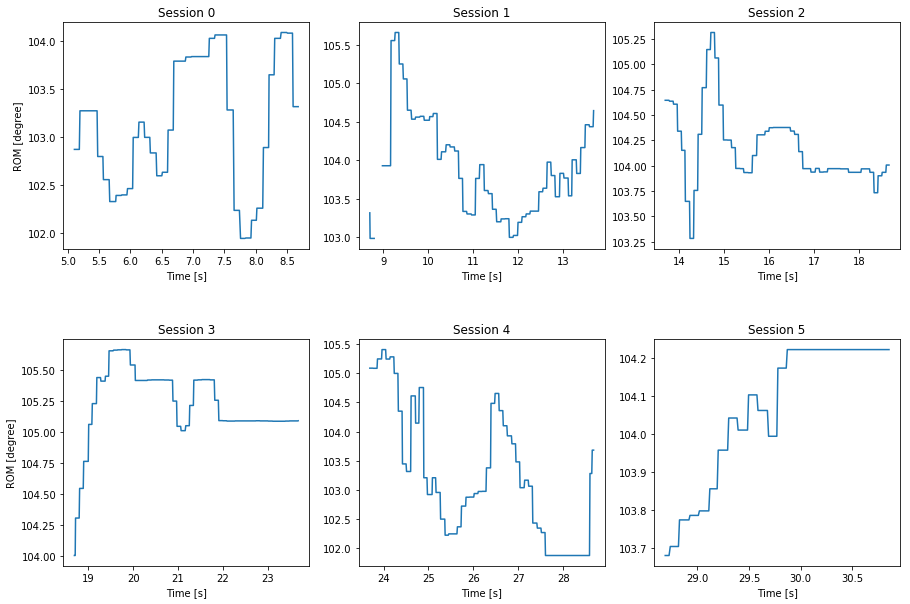

In [9]:
%matplotlib inline
plt.figure(figsize=(15,10))
nrows = int(math.ceil(nsessions/3.0))
t_index = 0
for i in range(0,nsessions):
    string = [str(nrows), '3', str(i+1)]
    sp = ''.join(string)    
    plt.subplot(sp)
    plt.gca().set_title('Session %i' %i)
    plt.plot(time[t_index:t_index+len(result[i])],result[i])
    plt.xlabel('Time [s]')
    if((i%3)==0):
        plt.ylabel('ROM [degree]')
    t_index = t_index+len(result[i])

plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show() 